<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/%EC%98%88%EC%A0%9C3_%EC%A4%91%EC%84%B1%EC%9E%90%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 23kB/s 
     |████████████████████████████████| 3.8MB 35.5MB/s 
     |████████████████████████████████| 512kB 41.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=18eccd41d914cf59612647ce7effc18f0223f6836952e59512fa460730046d52
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 pandas 를 사용
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/logistic/kaggle/예제3_중성자별.csv', dtype=np.float32)
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

In [4]:
xy_df.columns = ['통합 프로필 평균', '통합 프로필 표준편차', '통합 프로필 과도한 첨도', '통합 프로필 왜곡도', 'DM-SNR 곡선의 평균', 'DM-SNR 곡선의 표준편차', 'DM-SNR 곡선의 과도한 첨도', 'DM-SNR 곡선의 왜곡도', '예측결과']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,통합 프로필 평균,통합 프로필 표준편차,통합 프로필 과도한 첨도,통합 프로필 왜곡도,DM-SNR 곡선의 평균,DM-SNR 곡선의 표준편차,DM-SNR 곡선의 과도한 첨도,DM-SNR 곡선의 왜곡도,예측결과
0,140.562500,55.683781,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242226,0.0
1,102.507812,58.882431,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393578,0.0
2,103.015625,39.341648,0.323328,1.051164,3.121238,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178448,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593662,0.0
4,88.726562,40.672226,0.600866,1.123492,1.178930,11.468719,14.269573,252.567307,0.0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847420,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931030,0.0
17894,122.554688,49.485607,0.127978,0.323061,16.409698,44.626892,2.945244,8.297091,0.0
17895,119.335938,59.935940,0.159363,-0.743025,21.430601,58.872002,2.499517,4.595173,0.0
17896,114.507812,53.902401,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238907,0.0


In [5]:
pd.DataFrame(xy_df.mean(), columns=["평균 값"])

,평균 값
통합 프로필 평균,111.079773
통합 프로필 표준편차,46.549370
통합 프로필 과도한 첨도,0.477856
통합 프로필 왜곡도,1.770286
DM-SNR 곡선의 평균,12.614424
DM-SNR 곡선의 표준편차,26.326546
DM-SNR 곡선의 과도한 첨도,8.303542
DM-SNR 곡선의 왜곡도,104.857712
예측결과,0.091574


In [84]:
pd.DataFrame(xy_df.min(), columns=["최솟 값"])

,최솟 값
통합 프로필 평균,5.812500
통합 프로필 표준편차,24.772041
통합 프로필 과도한 첨도,-1.876011
통합 프로필 왜곡도,-1.791886
DM-SNR 곡선의 평균,0.213211
DM-SNR 곡선의 표준편차,7.370432
DM-SNR 곡선의 과도한 첨도,-3.139270
DM-SNR 곡선의 왜곡도,-1.976976
예측결과,0.000000


In [83]:
pd.DataFrame(xy_df.max(), columns=["최댓 값"])

,최댓 값
통합 프로필 평균,192.617188
통합 프로필 표준편차,98.778908
통합 프로필 과도한 첨도,8.069522
통합 프로필 왜곡도,68.101624
DM-SNR 곡선의 평균,223.392136
DM-SNR 곡선의 표준편차,110.642212
DM-SNR 곡선의 과도한 첨도,34.539845
DM-SNR 곡선의 왜곡도,1191.000854
예측결과,1.000000


In [0]:
y_data = xy_df.iloc[:,-1].values.reshape(-1,1)  # 레이블 데이터(예측결과)를 numpy로 추출

In [0]:
x_data = xy_df.iloc[:,:-1].values  # 피쳐데이터를 numpy로 추출

In [0]:
# 넘파이 배열 내 데이터타입 변경
x_data = x_data.astype('float32')
y_data = y_data.astype('float32')

In [9]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(17898, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [10]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(17898, 8)
[[ 1.40562500e+02  5.56837807e+01 -2.34571412e-01 -6.99648380e-01
   3.19983268e+00  1.91104259e+01  7.97553158e+00  7.42422256e+01]
 [ 1.02507812e+02  5.88824310e+01  4.65318143e-01 -5.15087903e-01
   1.67725754e+00  1.48601456e+01  1.05764866e+01  1.27393578e+02]
 [ 1.03015625e+02  3.93416481e+01  3.23328376e-01  1.05116439e+00
   3.12123752e+00  2.17446690e+01  7.73582220e+00  6.31719093e+01]
 [ 1.36750000e+02  5.71784477e+01 -6.84146360e-02 -6.36238396e-01
   3.64297652e+00  2.09592800e+01  6.89649868e+00  5.35936623e+01]
 [ 8.87265625e+01  4.06722260e+01  6.00866079e-01  1.12349164e+00
   1.17892981e+00  1.14687195e+01  1.42695732e+01  2.52567307e+02]
 [ 9.35703125e+01  4.66981125e+01  5.31904876e-01  4.16721106e-01
   1.63628757e+00  1.45450745e+01  1.06217480e+01  1.31393997e+02]
 [ 1.19484375e+02  4.87650604e+01  3.14602219e-02 -1.12167574e-01
   9.99163866e-01  9.27961254e+00  1.92062302e+01  4.79756561e+02]]


In [11]:
np.unique(y_data, return_counts=True)

(array([0., 1.], dtype=float32), array([16259,  1639]))

In [0]:
# 테스트세트를 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data, random_state=777) # 전체 데이터중 20%

In [13]:
np.unique(y_train, return_counts=True)

(array([0., 1.], dtype=float32), array([11381,  1147]))

In [14]:
print("학습용 ",x_train.shape, "\t", y_train.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (12528, 8) 	 (12528, 1)
테스트용  (5370, 8) 	 (5370, 1)


In [0]:
scaler = StandardScaler()

In [0]:
# 텐서플로우 그래프 그리기
num_x = x_data.shape[1]
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , 1]), name='weight') 
b = tf.Variable(tf.random.normal([1]), name='bias')

In [0]:
hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

In [0]:
cost = -tf.reduce_mean(Y*tf.log(hypothesis) +  (1-Y)*tf.log(1-hypothesis))

In [0]:
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)

In [0]:
predicted = tf.cast(hypothesis > 0.5 , dtype=tf.float32)

In [0]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
n_fold = 5 # 5개의 폴드
skf = StratifiedKFold(n_splits=n_fold) 
cv_accuracy = [] # 폴드세트별 정확도를 저장할 리스트

In [26]:
epochs = 4201
  
for step in range(epochs):
  fold_cost = 0
  fold_accuracy = 0
  for train_index, test_index in skf.split(x_train, y_train):
    train_random_index = np.random.permutation(train_index)
    test_random_index = np.random.permutation(test_index)

     # 학습폴드, 검증폴드 분리(피쳐, 레이블 별)
    train_feature_fold, val_feature_fold = x_train[train_random_index], x_train[test_random_index]
    train_label_fold, val_label_fold = y_train[train_random_index], y_train[test_random_index]

    # 학습폴드를 기준으로 표준화
    scaler.fit(train_feature_fold)
    
    # 학습폴드를 기준으로 학습폴드, 검증폴드를 표준화
    train_feature_fold_scaled = scaler.transform(train_feature_fold) 
    val_feature_fold_scaled = scaler.transform(val_feature_fold) 

    # 학습폴드로 학습 
    cost_val, W_all, _ = sess.run([cost, W, train], feed_dict={X:train_feature_fold_scaled, Y:train_label_fold})

    fold_cost += cost_val
    w_history.append(W_all.copy())  

    # 폴드세트별 Accuracy 저장 
    fold_accuracy += sess.run(accuracy, feed_dict={X:val_feature_fold_scaled, Y:val_label_fold})


  cv_accuracy.append(fold_accuracy/n_fold) # epoch 별 검증폴드의 평균 Accuracy를 저장한다
  cost_list.append(fold_cost/n_fold) # epoch 별 학습폴드의 평균 cost를 저장한다

  if step % 200 == 0:
    print("step=",step," cost=", fold_cost/n_fold, "accuracy=",fold_accuracy/n_fold)

step= 0  cost= 1.7755021810531617 accuracy= 0.27219071984291077
step= 200  cost= 1.048154640197754 accuracy= 0.4905812621116638
step= 400  cost= 0.6468131065368652 accuracy= 0.7757021069526673
step= 600  cost= 0.46376176476478576 accuracy= 0.8811461448669433
step= 800  cost= 0.36122732162475585 accuracy= 0.9115582942962647
step= 1000  cost= 0.2970335364341736 accuracy= 0.9293584108352662
step= 1200  cost= 0.2545289099216461 accuracy= 0.9395755290985107
step= 1400  cost= 0.22490696012973785 accuracy= 0.9474781036376954
step= 1600  cost= 0.20327675342559814 accuracy= 0.9543423652648926
step= 1800  cost= 0.1868529200553894 accuracy= 0.9595308661460876
step= 2000  cost= 0.17398538291454316 accuracy= 0.9643199205398559
step= 2200  cost= 0.16364913582801818 accuracy= 0.9667145490646363
step= 2400  cost= 0.15517720878124236 accuracy= 0.9679916143417359
step= 2600  cost= 0.14811733067035676 accuracy= 0.9689494729042053
step= 2800  cost= 0.142151939868927 accuracy= 0.9699871182441712
step= 3000

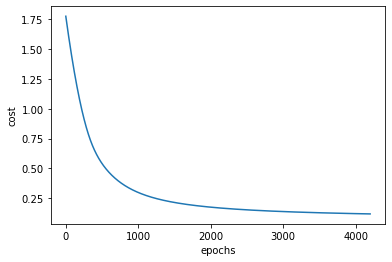

In [30]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

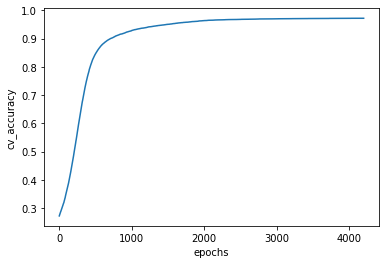

In [31]:
plt.plot(cv_accuracy)
plt.xlabel("epochs")
plt.ylabel("cv_accuracy")
plt.show()

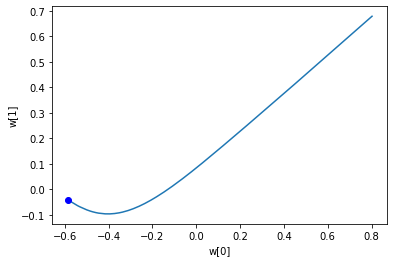

In [32]:
# 가중치 업데이트 과정 그래프 (임신횟수, 공복혈당농도)
w0 = []
w1 = []
for w in  w_history:
  w0.append(w[0])
  w1.append(w[1])
plt.plot(w0, w1)
plt.plot(w0[-1], w1[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
plt.show()

In [33]:
# 테스트 세트에 대한 정확도 구하기
x_test_scaled = scaler.transform(x_test)
a = sess.run(accuracy, feed_dict={X:x_test_scaled, Y:y_test})
print("정확도 : ", str(a*100)[:5], "%", sep="")

정확도 : 97.29%


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[111,46,0.47,1.77,12.6,26.3,8.3,104],
                     [5,46,0.47,1.77,12.6,26.3,8.3,104],     
                     [111,1,0.47,1.77,12.6,26.3,8.3,104],    
                     [111,46,8,1.77,12.6,26.3,8.3,104],      
                     [111,46,0.47,70.77,12.6,26.3,8.3,104],  
                     [111,46,0.47,1.77,300,26.3,8.3,104],    
                     [111,46,0.47,1.77,12.6,110,8.3,104],    
                     [111,46,0.47,1.77,12.6,26.3,40,104],    
                     [111,46,0.47,1.77,12.6,26.3,8.3,1300]]) 
X_test_5_scaled = scaler.transform(X_test_5)

In [143]:
print(sess.run(predicted, feed_dict={X:X_test_5_scaled}))

[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [144]:
try:
  x_input = input("입력(통합 프로필 평균, 통합 프로필 표준편차, 통합 프로필 과도한 첨도, 통합 프로필 왜곡도, DM-SNR 곡선의 평균, DM-SNR 곡선의 표준편차, DM-SNR 곡선의 과도한 첨도, DM-SNR 곡선의 왜곡도): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("통합 프로필 평균\t통합 프로필 표준편차\t통합 프로필 과도한 첨도\t\t통합 프로필 왜곡도\tDM-SNR 곡선의 평균\tDM-SNR 곡선의 표준편차\t\tDM-SNR 곡선의 과도한 첨도\tDM-SNR 곡선의 왜곡도")
  for i in x_input_strip:
    print(i,end="\t\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = scaler.transform(x_input_test)

  print("예상 결과 : ", (sess.run(predicted, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")

입력(통합 프로필 평균, 통합 프로필 표준편차, 통합 프로필 과도한 첨도, 통합 프로필 왜곡도, DM-SNR 곡선의 평균, DM-SNR 곡선의 표준편차, DM-SNR 곡선의 과도한 첨도, DM-SNR 곡선의 왜곡도): 111,46,0.47,1.77,12.6,26.3,8.3,104
통합 프로필 평균	통합 프로필 표준편차	통합 프로필 과도한 첨도		통합 프로필 왜곡도	DM-SNR 곡선의 평균	DM-SNR 곡선의 표준편차		DM-SNR 곡선의 과도한 첨도	DM-SNR 곡선의 왜곡도
111.0		46.0		0.47		1.77		12.6		26.3		8.3		104.0		
예상 결과 :  [[0.]]


In [0]:
result_df = pd.DataFrame(X_test_5, columns=['통합프로필 평균', '통합프로필 표준편차', '통합프로필 과도한첨도', '통합프로필 왜곡도', 'DM-SNR 곡선의 평균', 'DM-SNR 곡선의 표준편차', 'DM-SNR 곡선의 과도한 첨도', 'DM-SNR 곡선의 왜곡도'])

In [151]:
result_df

,통합프로필 평균,통합프로필 표준편차,통합프로필 과도한첨도,통합프로필 왜곡도,DM-SNR 곡선의 평균,DM-SNR 곡선의 표준편차,DM-SNR 곡선의 과도한 첨도,DM-SNR 곡선의 왜곡도
0,111.0,46.0,0.47,1.77,12.6,26.3,8.3,104.0
1,5.0,46.0,0.47,1.77,12.6,26.3,8.3,104.0
2,111.0,1.0,0.47,1.77,12.6,26.3,8.3,104.0
3,111.0,46.0,8.00,1.77,12.6,26.3,8.3,104.0
4,111.0,46.0,0.47,70.77,12.6,26.3,8.3,104.0
5,111.0,46.0,0.47,1.77,300.0,26.3,8.3,104.0
6,111.0,46.0,0.47,1.77,12.6,110.0,8.3,104.0
7,111.0,46.0,0.47,1.77,12.6,26.3,40.0,104.0
8,111.0,46.0,0.47,1.77,12.6,26.3,8.3,1300.0


In [0]:
result_df['예측 결과'] = sess.run(predicted, feed_dict={X:X_test_5_scaled})

In [0]:
result_df.loc[result_df["예측 결과"]==1,"예측 결과"] = "O"
result_df.loc[result_df["예측 결과"]==0,"예측 결과"] = "X"

In [154]:
result_df

,통합프로필 평균,통합프로필 표준편차,통합프로필 과도한첨도,통합프로필 왜곡도,DM-SNR 곡선의 평균,DM-SNR 곡선의 표준편차,DM-SNR 곡선의 과도한 첨도,DM-SNR 곡선의 왜곡도,예측 결과
0,111.0,46.0,0.47,1.77,12.6,26.3,8.3,104.0,X
1,5.0,46.0,0.47,1.77,12.6,26.3,8.3,104.0,O
2,111.0,1.0,0.47,1.77,12.6,26.3,8.3,104.0,X
3,111.0,46.0,8.00,1.77,12.6,26.3,8.3,104.0,O
4,111.0,46.0,0.47,70.77,12.6,26.3,8.3,104.0,O
5,111.0,46.0,0.47,1.77,300.0,26.3,8.3,104.0,X
6,111.0,46.0,0.47,1.77,12.6,110.0,8.3,104.0,O
7,111.0,46.0,0.47,1.77,12.6,26.3,40.0,104.0,O
8,111.0,46.0,0.47,1.77,12.6,26.3,8.3,1300.0,X


In [0]:
sess.close()